In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ptk

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
corpes_df = pd.read_csv('./clean_tweets_corpes.csv')
tweets_df = pd.read_csv('./original_tweets_corpes.csv')
tweets_df['tweet_dates']= pd.to_datetime(tweets_df['tweet_dates'], errors = 'coerce')

In [3]:
corpes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40117 entries, 0 to 40116
Data columns (total 6 columns):
source            40117 non-null object
text              40117 non-null object
retweet_count     40117 non-null float64
favorite_count    40117 non-null float64
is_retweet        40059 non-null object
tweet_dates       40117 non-null object
dtypes: float64(2), object(4)
memory usage: 1.8+ MB


In [10]:
tweets_df['favorite_count'].describe()

count     37980.000000
mean      21384.119089
std       41483.285115
min           0.000000
25%          27.000000
50%         174.000000
75%       18488.250000
max      880618.000000
Name: favorite_count, dtype: float64

Text(0.5, 1.0, 'Ways he sent out tweets over the years')

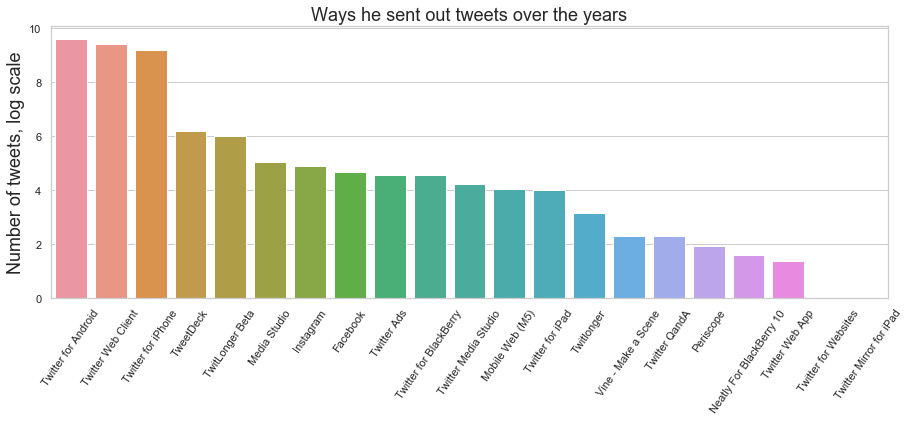

In [11]:
source_vc = tweets_df["source"].value_counts()
plt.figure(figsize = (15,5))
source_graph = sns.barplot(x=source_vc.index,y = np.log(source_vc.values))
source_graph.set_xticklabels(source_graph.get_xticklabels(),rotation=55);
plt.ylabel('Number of tweets, log scale', size = 18)
plt.title('Ways he sent out tweets over the years', fontsize = 18)

In [170]:
year = tweets_df['tweet_dates'].dt.year

Text(0.5, 1.0, 'Which year has he tweeted the most?')

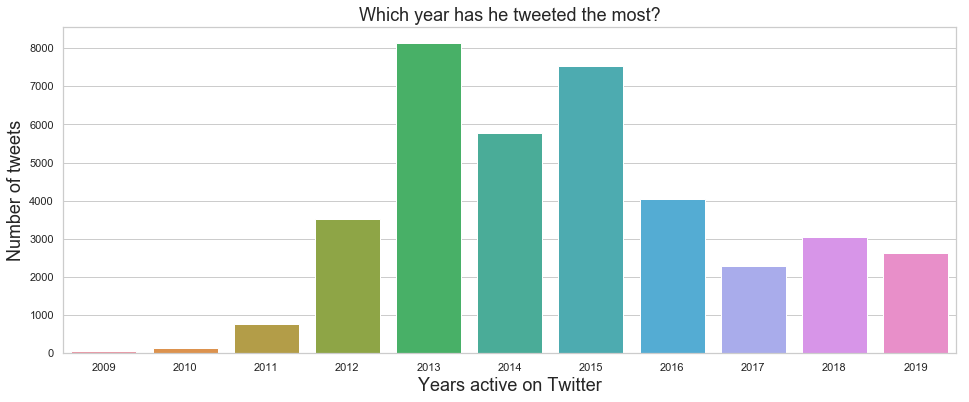

In [169]:
year_value_counts = tweets_df['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = year_value_counts.index, y = year_value_counts.values);
plt.xlabel('Years active on Twitter', fontsize = 18)
plt.ylabel('Number of tweets', fontsize = 18)
plt.title('Which year has he tweeted the most?', fontsize = 18)

Text(0, 0.5, 'Frequence of tweets')

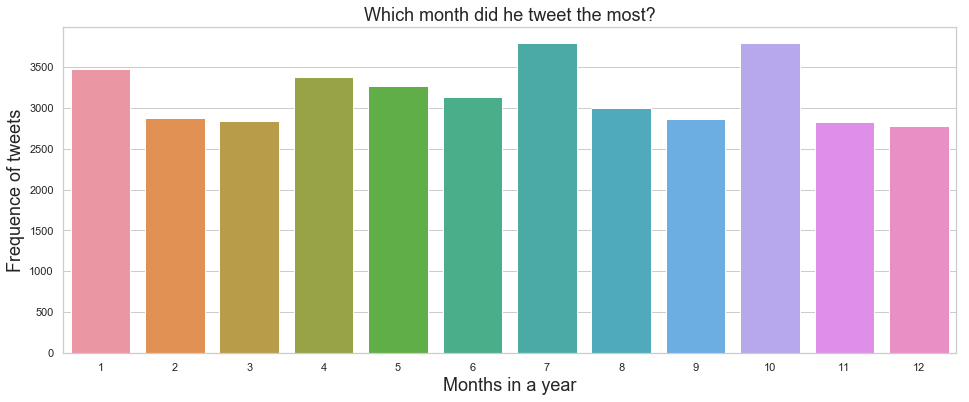

In [171]:
months = tweets_df['tweet_dates'].dt.month
months_value_counts = months.value_counts().sort_index()
plt.figure(figsize = (16,6))
sns.barplot(x = months_value_counts.index, y = months_value_counts.values);
plt.title('Which month did he tweet the most?', fontsize = 18)
plt.xlabel('Months in a year', fontsize = 18)
plt.ylabel('Frequence of tweets', fontsize = 18)

Text(0.5, 1.0, 'Which day in the month does he tweet the most?')

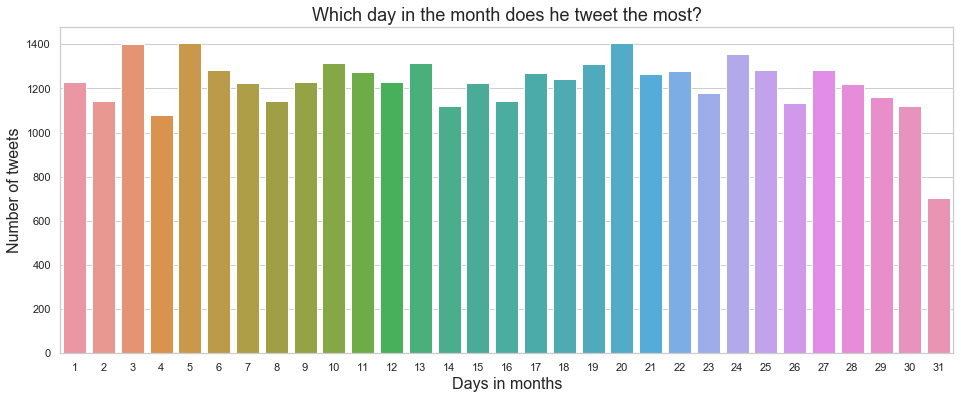

In [198]:
days = tweets_df['tweet_dates'].dt.day
days_value_counts = days.value_counts().sort_index()
plt.figure(figsize = (16,6))
sns.barplot(x = days_value_counts.index, y = days_value_counts.values)
plt.xlabel('Days in months', fontsize = 16)
plt.ylabel('Number of tweets', fontsize = 16)
plt.title('Which day in the month does he tweet the most?', fontsize = 18)

Text(0.5, 1.0, 'What hours in a day does he tweet the most?')

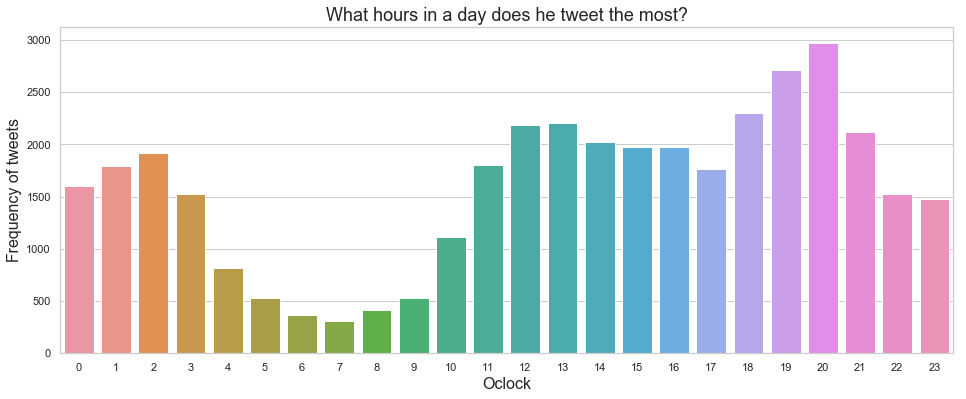

In [187]:
hours_value_count = tweets_df['tweet_dates'].dt.hour.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = hours_value_count.index, y = hours_value_count.values)
plt.xlabel('Oclock', fontsize = 16)
plt.ylabel('Frequency of tweets', fontsize = 16)
plt.title('What hours in a day does he tweet the most?', fontsize = 18)

In [60]:
engage_mean = tweets_df.groupby(tweets_df['tweet_dates'].dt.year).mean()
engage_mean.drop(columns = ['is_retweet'], inplace = True)
engage_mean['retweet_count'] = np.log(engage_mean['retweet_count'])
engage_mean['favorite_count'] = np.log(engage_mean['favorite_count'])

Text(0.5, 1.0, 'Engagement over the years')

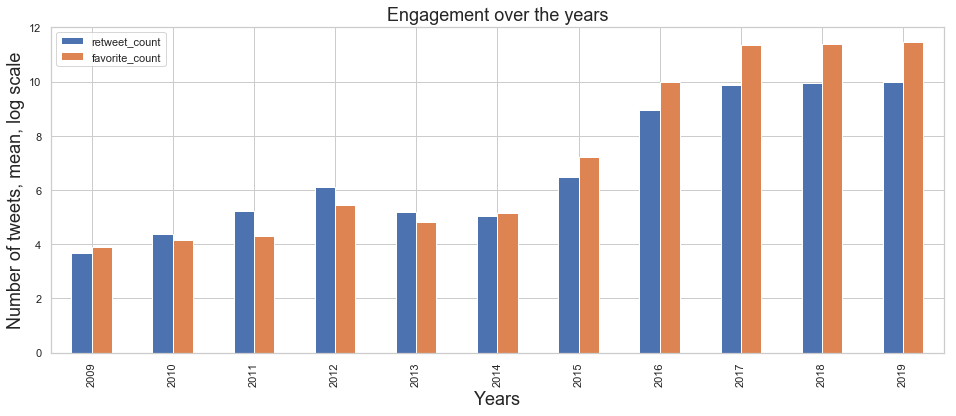

In [68]:
engage_mean.plot(kind = 'bar', figsize = (16,6))
plt.ylabel('Number of tweets, mean, log scale', fontsize = 18)
plt.xlabel('Years', fontsize = 18)
plt.title('Engagement over the years', fontsize = 18)

Text(0.5, 1.0, 'Followers Enagement')

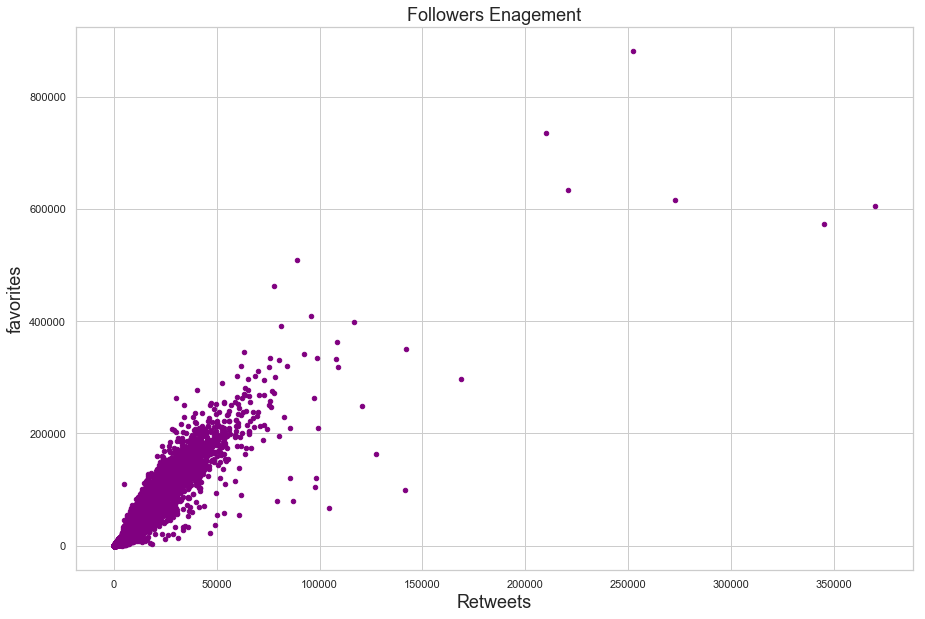

In [69]:
tweets_df.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', figsize = (15,10), c = 'purple')
plt.xlabel('Retweets', fontsize = 18)
plt.ylabel('favorites', fontsize = 18)
plt.title('Followers Enagement', fontsize = 18)

Text(0.5, 1.0, 'Corrolation between types of engagement')

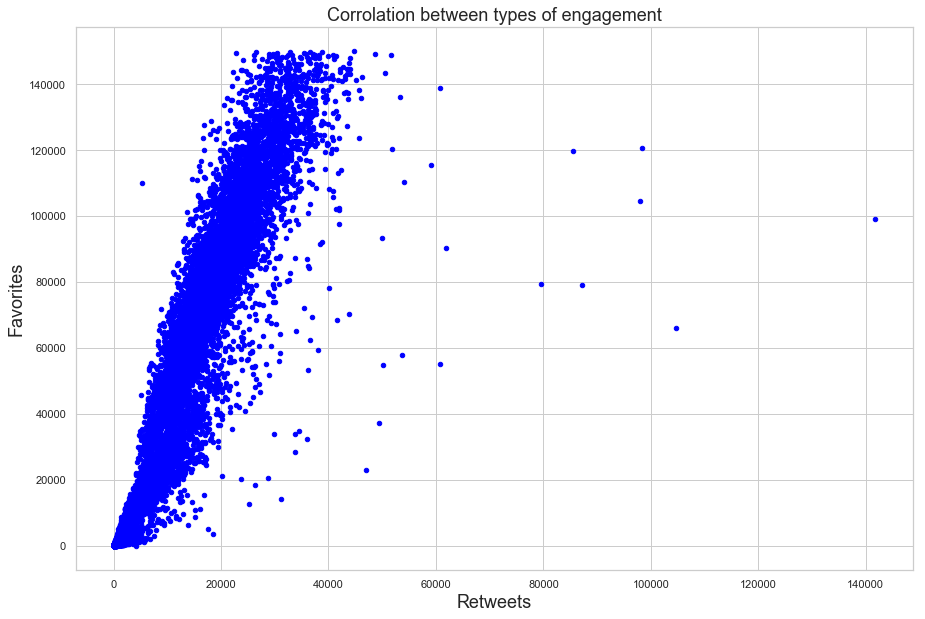

In [70]:
outlier_release_mask = (tweets_df['retweet_count'] < 150000) & (tweets_df['favorite_count'] < 150000)
tweets_df[outlier_release_mask].plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', figsize = (15,10), c = 'blue')
plt.xlabel('Retweets', fontsize = 18)
plt.ylabel('Favorites', fontsize = 18)
plt.title('Corrolation between types of engagement', fontsize = 18)

In [78]:
tweets_df['favorite_count'].describe()

count     37980.000000
mean      21384.119089
std       41483.285115
min           0.000000
25%          27.000000
50%         174.000000
75%       18488.250000
max      880618.000000
Name: favorite_count, dtype: float64

In [199]:
tweets_df['retweet_count'].describe()

count     37980.000000
mean       5415.087546
std       10556.778033
min           0.000000
25%          20.000000
50%         236.000000
75%        6490.750000
max      369530.000000
Name: retweet_count, dtype: float64

In [203]:
tweets_df[tweets_df['favorite_count'] == 880618]

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
37725,Twitter for iPhone,A$AP Rocky released from prison and on his way...,252038.0,880618.0,False,2019-08-02 17:41:30


In [204]:
tweets_df[tweets_df['retweet_count']==369530]

,source,text,retweet_count,favorite_count,is_retweet,tweet_dates
30964,Twitter for iPhone,#FraudNewsCNN #FNN LINK,369530.0,605098.0,False,2017-07-02 13:21:42


Text(0.5, 1.0, 'What year did he have lowest favorite engagement?')

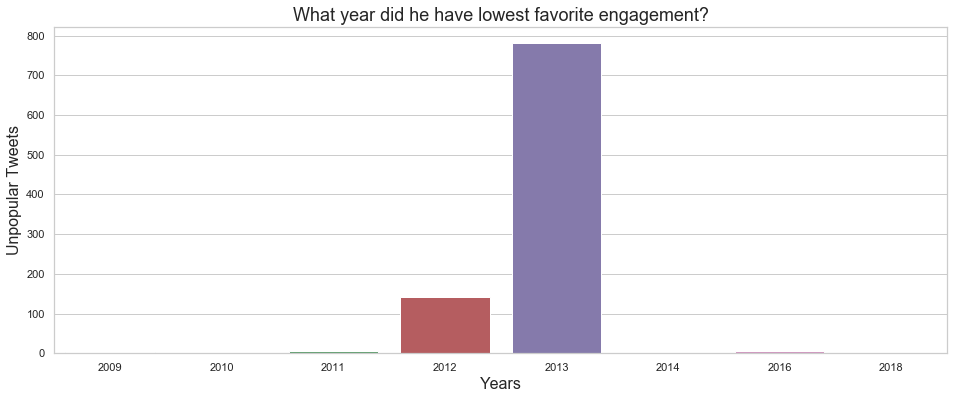

In [212]:
unpopular_tweets = tweets_df[tweets_df['favorite_count'] == 0]
unpopular_tweets_vc = unpopular_tweets['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = unpopular_tweets_vc.index, y = unpopular_tweets_vc.values)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Unpopular Tweets', fontsize = 16)
plt.title('What year did he have lowest favorite engagement?', fontsize = 18)

Text(0.5, 1.0, 'What year did he have lowest retweet engagement?')

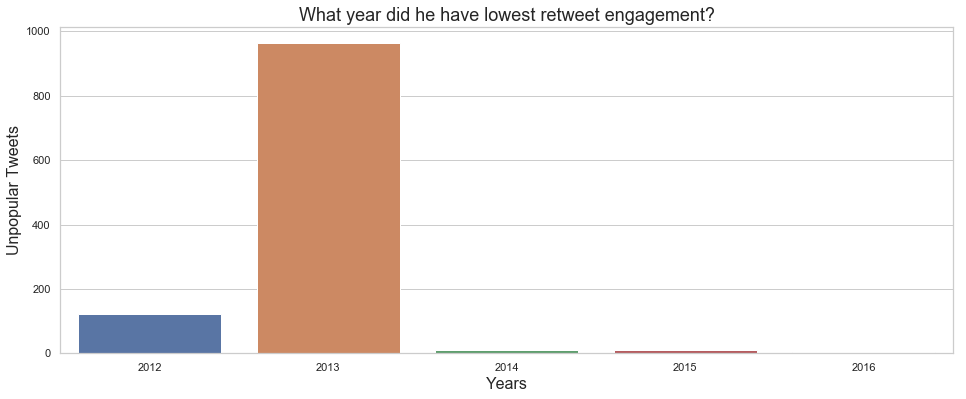

In [213]:
unpopular_tweets_1 = tweets_df[tweets_df['retweet_count'] == 0]
unpopular_tweets_1_vc = unpopular_tweets_1['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = unpopular_tweets_1_vc.index, y = unpopular_tweets_1_vc.values)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Unpopular Tweets', fontsize = 16)
plt.title('What year did he have lowest retweet engagement?', fontsize = 18)

Text(0.5, 1.0, 'Zero Engagement Tweets')

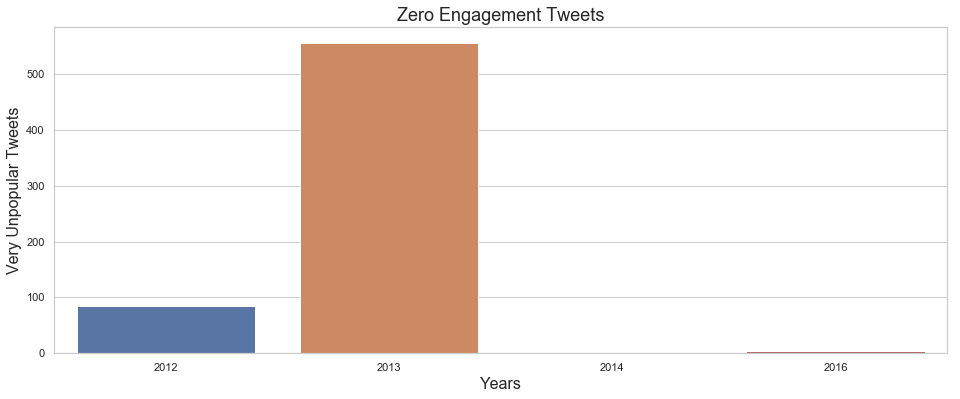

In [227]:
super_unpopular_tweets = tweets_df[(tweets_df['favorite_count'] == 0) & (tweets_df['retweet_count'] == 0)]
vunpopular_tweets_vc = super_unpopular_tweets['tweet_dates'].dt.year.value_counts()
plt.figure(figsize = (16,6))
sns.barplot(x = vunpopular_tweets_vc.index, y =vunpopular_tweets_vc.values)
plt.xlabel('Years', fontsize = 16)
plt.ylabel('Very Unpopular Tweets', fontsize = 16)
plt.title('Zero Engagement Tweets', fontsize = 18)

In [231]:
#sns.jointplot(tweets_df['retweet_count'].dt., tweets_df['favorite_count'], kind='scatter')
yearly_average

tweet_dates
2009       39.071429
2010       79.380282
2011      188.169909
2012      457.570660
2013      179.119966
2014      156.656120
2015      650.514199
2016     7658.627942
2017    19472.020942
2018    20950.810900
2019    21681.088224
Name: retweet_count, dtype: float64

In [229]:
#tweets_df.hist(column ='favorite_count', by =tweets_df['tweet_dates'].dt.year, sharex= True, sharey = True, layout = (6,2));

In [89]:
'''
plt.figure(figsize = (15,6))
dis_graph = sns.distplot(year, hist = True, color = 'darkred', bins = 10, kde = False)
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number of tweets', fontsize=18)
'''

"\nplt.figure(figsize = (15,6))\ndis_graph = sns.distplot(year, hist = True, color = 'darkred', bins = 10, kde = False)\nplt.xlabel('Years', fontsize=18)\nplt.ylabel('Number of tweets', fontsize=18)\n"

In [92]:
presidency_years = tweets_df['tweet_dates'].dt.year.values >= 2016

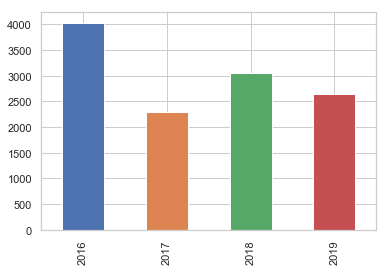

In [153]:
tweets_df[presidency_years]['tweet_dates'].dt.year.value_counts().sort_index().plot(kind = 'bar')

In [143]:
tweets_during_presidency = tweets_df[presidency_years].shape[0]
total_tweets = tweets_df.shape[0]
(total_tweets / tweets_during_presidency) * 100

316.07856191744344